In [175]:
import os
os.chdir('C:\\Users\\David\\Documents\\GitHub\\Retreat_2019\\R_S_P')

In [176]:
#### Analysis rsp alcohol competition
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import scikit_posthocs as sp
from function_randomness import randomness_sequence
from function_randomness_old import randomness_old



In [177]:
os.chdir('C:\\Users\\David\\Documents\\GitHub\\Retreat_2019\\R_S_P\\results')
os.listdir()

for idx, file in enumerate(os.listdir()):
    print(idx, file)

0 0_yerko_Tiff.xlsx
1 1 _Rocio_Heike.xlsx
2 1_alba_david.xlsx
3 1_Cris_Amanda.xlsx
4 1_genis_jordi.xlsx
5 1_jaime_vicky.xlsx
6 1_lejla_anna.xlsx
7 1_lluis_david.xlsx
8 1_lluis_joao.xlsx
9 1_lluis_klaus.xlsx
10 1_pablo_jorge.xlsx
11 2_anna_jordi.xlsx
12 2_lluis_klaus.xlsx
13 2_Pablo_Jaime.xlsx
14 2_vicky_jorge.xlsx


### Load the files into one DataFrame

In [178]:

probs_1 = ['p1_lik_1', 'p1_lik_2', 'p1_lik_3', 'p1_lik_4', 'p1_lik_5', 'p1_lik_6', 'p1_lik_7','p1_lik_8','p1_lik_9',
           'p1_lik_10', 'p1_lik_11', 'p1_lik_12', 'p1_lik_13', 'p1_lik_14', 'p1_lik_15', 'p1_lik_16', 'p1_lik_17', 
            'p1_lik_18', 'p1_lik_19', 'p1_lik_20', 'p1_lik_21', 'p1_lik_22', 'p1_lik_23', 'p1_lik_24']

probs_2 = ['p2_lik_1', 'p2_lik_2', 'p2_lik_3', 'p2_lik_4', 'p2_lik_5', 'p2_lik_6', 'p2_lik_7','p2_lik_8','p2_lik_9',
           'p2_lik_10', 'p2_lik_11', 'p2_lik_12', 'p2_lik_13', 'p2_lik_14', 'p2_lik_15', 'p2_lik_16', 'p2_lik_17', 
            'p2_lik_18', 'p2_lik_19', 'p2_lik_20', 'p2_lik_21', 'p2_lik_22', 'p2_lik_23', 'p2_lik_24']

In [179]:
#root_save = os.getcwd() + '\\results\\' 
#os.chdir(root_save)

os.listdir()

frames = []
for idx, file in enumerate(os.listdir()):
    df_s = pd.read_excel(file)
    df_s['rounds'] = idx
    randomness_p1 =  round(randomness_sequence(list(df_s['resp1'].values) )[0], 3) 
    randomness_p2 =  round(randomness_sequence(list(df_s['resp2'].values) )[0], 3) 
    df_s[probs_1] = randomness_sequence(list(df_s['resp1'].values) )[1][:-1]
    df_s[probs_2] = randomness_sequence(list(df_s['resp2'].values) )[1][:-1]
    #####
    df_s['randomness_p1']=randomness_p1
    df_s['randomness_p2']=randomness_p2
    frames.append(df_s)

df = pd.concat(frames, ignore_index=True)
df.head(10)


,player1,player2,resp1,resp2,result,winner_round,b_p1,b_p2,repetition,p1_lik_1,...,p2_lik_21,p1_lik_22,p2_lik_22,p1_lik_23,p2_lik_23,p1_lik_24,p2_lik_24,rounds,randomness_p1,randomness_p2
0,yerko,Tiff,p,r,yerko,yerko,3,3,0,1.641116,...,1.963334e-17,2.288580e-18,2.288580e-18,2.661864e-19,2.661864e-19,3.089846e-20,3.089846e-20,0,28.499,29.142
1,yerko,Tiff,s,p,yerko,yerko,3,3,0,1.641116,...,1.963334e-17,2.288580e-18,2.288580e-18,2.661864e-19,2.661864e-19,3.089846e-20,3.089846e-20,0,28.499,29.142
2,yerko,Tiff,s,r,Tiff,yerko,3,3,0,1.641116,...,1.963334e-17,2.288580e-18,2.288580e-18,2.661864e-19,2.661864e-19,3.089846e-20,3.089846e-20,0,28.499,29.142
3,yerko,Tiff,p,s,Tiff,yerko,3,3,0,1.641116,...,1.963334e-17,2.288580e-18,2.288580e-18,2.661864e-19,2.661864e-19,3.089846e-20,3.089846e-20,0,28.499,29.142
4,yerko,Tiff,s,p,yerko,yerko,3,3,0,1.641116,...,1.963334e-17,2.288580e-18,2.288580e-18,2.661864e-19,2.661864e-19,3.089846e-20,3.089846e-20,0,28.499,29.142
5,yerko,Tiff,r,p,Tiff,yerko,3,3,0,1.641116,...,1.963334e-17,2.288580e-18,2.288580e-18,2.661864e-19,2.661864e-19,3.089846e-20,3.089846e-20,0,28.499,29.142
6,yerko,Tiff,p,s,Tiff,yerko,3,3,0,1.641116,...,1.963334e-17,2.288580e-18,2.288580e-18,2.661864e-19,2.661864e-19,3.089846e-20,3.089846e-20,0,28.499,29.142
7,yerko,Tiff,s,s,draw,yerko,3,3,0,1.641116,...,1.963334e-17,2.288580e-18,2.288580e-18,2.661864e-19,2.661864e-19,3.089846e-20,3.089846e-20,0,28.499,29.142
8,yerko,Tiff,s,p,yerko,yerko,3,3,0,1.641116,...,1.963334e-17,2.288580e-18,2.288580e-18,2.661864e-19,2.661864e-19,3.089846e-20,3.089846e-20,0,28.499,29.142
9,yerko,Tiff,s,r,Tiff,yerko,3,3,0,1.641116,...,1.963334e-17,2.288580e-18,2.288580e-18,2.661864e-19,2.661864e-19,3.089846e-20,3.089846e-20,0,28.499,29.142


### Correlation beer consumption and randomness ?

In [180]:
df.repetition.unique()

array([0, 1, 2], dtype=int64)

In [181]:
df['rounds'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [182]:
beer_n = []
r_value=[]
winner=[]

for r in df['rounds'].unique():
    r_value.append(df.loc[df['rounds']==r,'randomness_p1'].iloc[0])
    r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
    beer_n.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
    beer_n.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  


df_b_r = pd.DataFrame({'beer': beer_n, 'rand': r_value})


number of outliers: 1


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


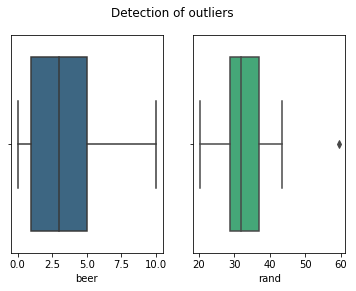

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


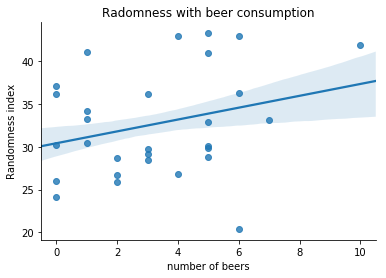

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.323
Date:                Mon, 18 Mar 2019   Prob (F-statistic):              0.139
Time:                        15:13:02   Log-Likelihood:                -92.562
No. Observations:                  29   AIC:                             189.1
Df Residuals:                      27   BIC:                             191.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4259      1.872     16.249      0.0

In [183]:

def remove_outlier_mult_columns(df_in, col_names, plot=True):
    ### column names is a list of the columns to remove outliers
    outliers_booleans = []
    for col_name in col_names:        
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        #
        inf_outliers = df_in[col_name] < fence_low ## outliers = 1
        sup_outliers = df_in[col_name] > fence_high ## outliers = 1
        outliers_booleans.append ( inf_outliers + sup_outliers )
    
    outliers_bool = sum(outliers_booleans)
    outliers_bool[outliers_bool>=1] = 1
    print( 'number of outliers: ' + str(sum(outliers_bool)) )
    outliers_bool = outliers_bool == 0
    
    ###boxplots of outliers
    if plot ==True:
        fig = plt.figure()
        fig.suptitle('Detection of outliers')
        pallete = sns.color_palette("viridis", n_colors=len(col_names), desat=1).as_hex()
        for idx,col_name in enumerate(col_names):
            ax1 = fig.add_subplot(1,len(col_names),idx+1)
            sns.boxplot(df_b_r[col_name], orient="h", ax=ax1, color=pallete[idx])

        ##
        plt.show()
        ##
    
    ###
    return df_in[outliers_bool]
    

##   
        
df_b_r = remove_outlier_mult_columns( df_b_r, ['beer','rand'])


sns.regplot(df_b_r['beer'], df_b_r['rand'], ci=68, fit_reg=True)
plt.title('Radomness with beer consumption')
plt.xlabel('number of beers')
plt.ylabel('Randomness index')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#ols
mod = ols('rand ~ beer', data=df_b_r).fit()
print(mod.summary())


number of outliers: 1


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


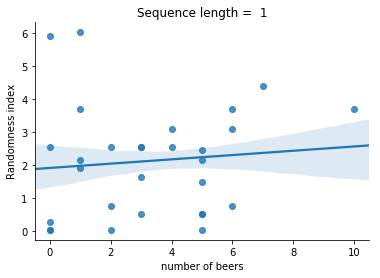

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.2661
Date:                Mon, 18 Mar 2019   Prob (F-statistic):              0.610
Time:                        15:13:02   Log-Likelihood:                -55.357
No. Observations:                  29   AIC:                             114.7
Df Residuals:                      27   BIC:                             117.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9130      0.519      3.685      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


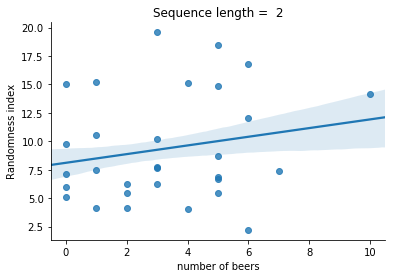

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.180
Date:                Mon, 18 Mar 2019   Prob (F-statistic):              0.287
Time:                        15:13:03   Log-Likelihood:                -88.048
No. Observations:                  30   AIC:                             180.1
Df Residuals:                      28   BIC:                             182.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1117      1.435      5.653      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


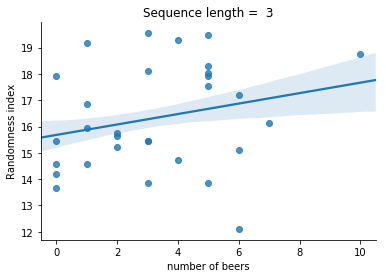

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.803
Date:                Mon, 18 Mar 2019   Prob (F-statistic):              0.190
Time:                        15:13:03   Log-Likelihood:                -62.101
No. Observations:                  30   AIC:                             128.2
Df Residuals:                      28   BIC:                             131.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6808      0.604     25.952      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


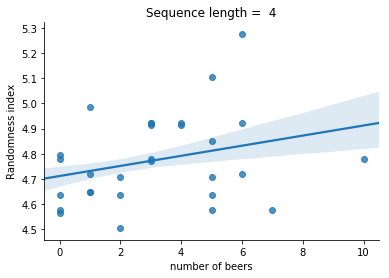

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.393
Date:                Mon, 18 Mar 2019   Prob (F-statistic):              0.134
Time:                        15:13:03   Log-Likelihood:                 10.880
No. Observations:                  29   AIC:                            -17.76
Df Residuals:                      27   BIC:                            -15.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7116      0.052     89.819      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


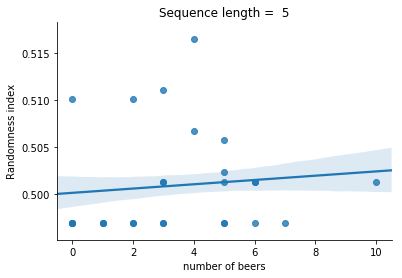

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.2912
Date:                Mon, 18 Mar 2019   Prob (F-statistic):              0.594
Time:                        15:13:03   Log-Likelihood:                 106.85
No. Observations:                  28   AIC:                            -209.7
Df Residuals:                      26   BIC:                            -207.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5001      0.002    288.122      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


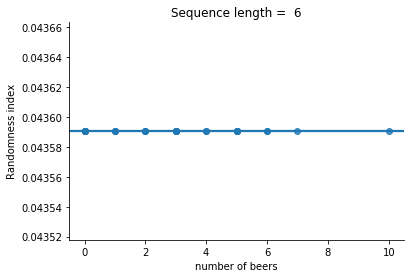

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     38.40
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           2.10e-06
Time:                        15:13:04   Log-Likelihood:                 1002.8
No. Observations:                  26   AIC:                            -2002.
Df Residuals:                      24   BIC:                            -1999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0436   1.41e-18    3.1e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


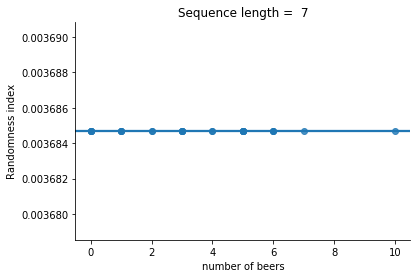

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                     -10.655
Model:                            OLS   Adj. R-squared:                -11.087
Method:                 Least Squares   F-statistic:                    -24.68
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:04   Log-Likelihood:                 1149.4
No. Observations:                  29   AIC:                            -2295.
Df Residuals:                      27   BIC:                            -2292.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0037   4.75e-19   7.75e+15      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


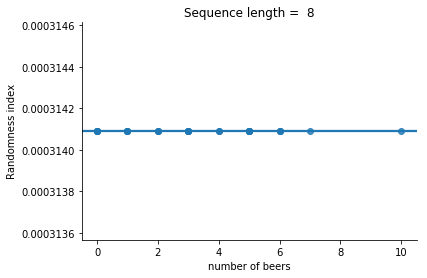

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     28.95
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           9.81e-06
Time:                        15:13:04   Log-Likelihood:                 1278.1
No. Observations:                  30   AIC:                            -2552.
Df Residuals:                      28   BIC:                            -2549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003    2.4e-20   1.31e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


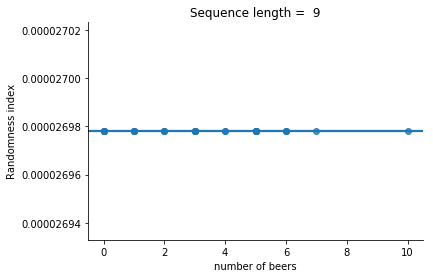

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     201.1
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           2.64e-14
Time:                        15:13:04   Log-Likelihood:                 1370.0
No. Observations:                  30   AIC:                            -2736.
Df Residuals:                      28   BIC:                            -2733.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.698e-05   1.12e-21   2.41e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


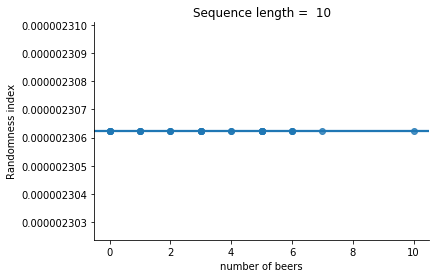

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -28.00
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:05   Log-Likelihood:                 1423.7
No. Observations:                  30   AIC:                            -2843.
Df Residuals:                      28   BIC:                            -2841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.306e-06   1.87e-22   1.23e+16      0.0

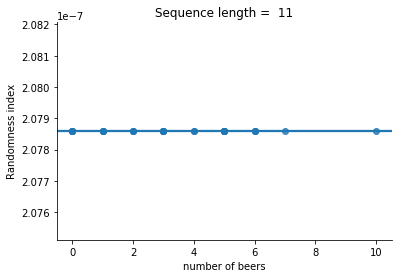

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                      -0.125
Model:                            OLS   Adj. R-squared:                 -0.165
Method:                 Least Squares   F-statistic:                    -3.111
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:05   Log-Likelihood:                 1494.5
No. Observations:                  30   AIC:                            -2985.
Df Residuals:                      28   BIC:                            -2982.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.079e-07   1.77e-23   1.17e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


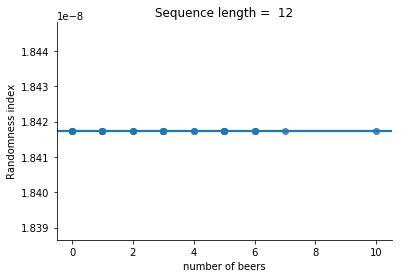

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -28.00
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:05   Log-Likelihood:                 1578.4
No. Observations:                  30   AIC:                            -3153.
Df Residuals:                      28   BIC:                            -3150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.842e-08   1.08e-24   1.71e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


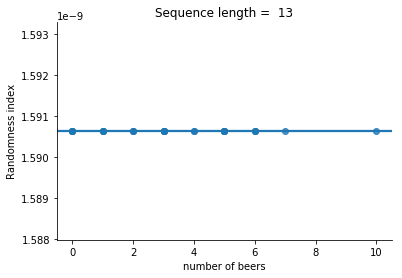

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -28.00
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:06   Log-Likelihood:                 1652.4
No. Observations:                  30   AIC:                            -3301.
Df Residuals:                      28   BIC:                            -3298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.591e-09   9.14e-26   1.74e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


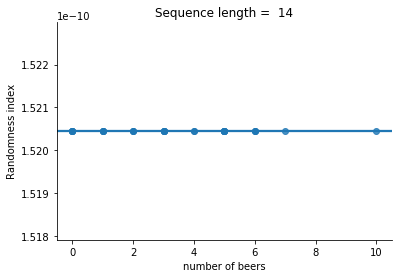

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                      -0.508
Model:                            OLS   Adj. R-squared:                 -0.562
Method:                 Least Squares   F-statistic:                    -9.436
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:06   Log-Likelihood:                 1698.0
No. Observations:                  30   AIC:                            -3392.
Df Residuals:                      28   BIC:                            -3389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.52e-10      2e-26    7.6e+15      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


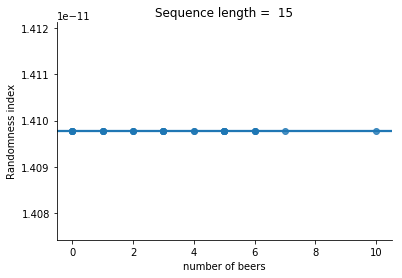

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -28.00
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:06   Log-Likelihood:                 1775.3
No. Observations:                  30   AIC:                            -3547.
Df Residuals:                      28   BIC:                            -3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.41e-11   1.52e-27   9.28e+15      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


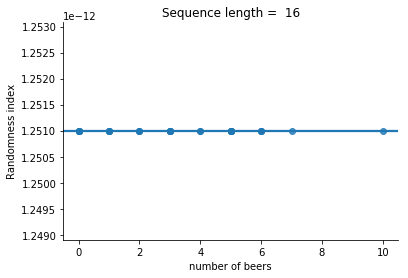

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                      -0.967
Model:                            OLS   Adj. R-squared:                 -1.037
Method:                 Least Squares   F-statistic:                    -13.76
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:07   Log-Likelihood:                 1860.4
No. Observations:                  30   AIC:                            -3717.
Df Residuals:                      28   BIC:                            -3714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.251e-12   8.92e-29    1.4e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


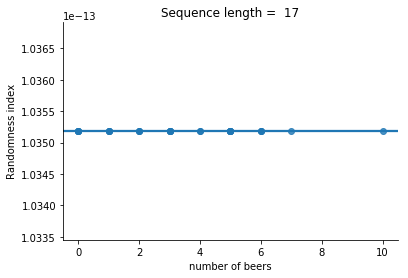

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                      -7.233
Model:                            OLS   Adj. R-squared:                 -7.527
Method:                 Least Squares   F-statistic:                    -24.60
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:07   Log-Likelihood:                 1922.1
No. Observations:                  30   AIC:                            -3840.
Df Residuals:                      28   BIC:                            -3837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.035e-13   1.14e-29   9.07e+15      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


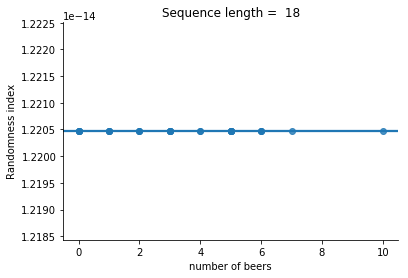

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                      -0.100
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    -2.545
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:07   Log-Likelihood:                 2014.6
No. Observations:                  30   AIC:                            -4025.
Df Residuals:                      28   BIC:                            -4022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.22e-14   5.21e-31   2.34e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


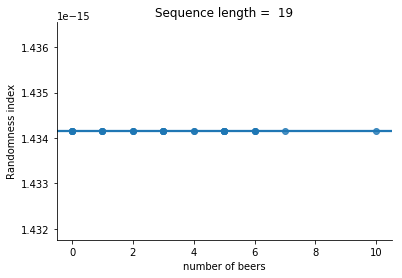

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -28.00
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:08   Log-Likelihood:                 2061.7
No. Observations:                  30   AIC:                            -4119.
Df Residuals:                      28   BIC:                            -4117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.434e-15   1.09e-31   1.32e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


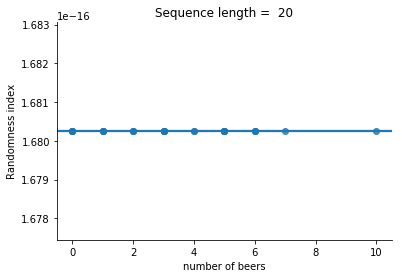

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                      -5.033
Model:                            OLS   Adj. R-squared:                 -5.249
Method:                 Least Squares   F-statistic:                    -23.36
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:08   Log-Likelihood:                 2113.9
No. Observations:                  30   AIC:                            -4224.
Df Residuals:                      28   BIC:                            -4221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.68e-16   1.91e-32   8.81e+15      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


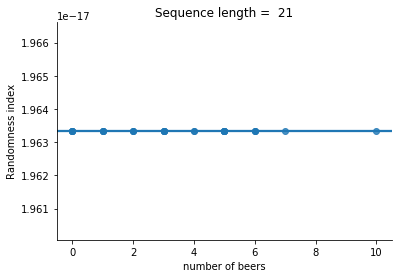

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     70.18
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           4.11e-09
Time:                        15:13:08   Log-Likelihood:                 2189.1
No. Observations:                  30   AIC:                            -4374.
Df Residuals:                      28   BIC:                            -4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.963e-17   1.56e-33   1.26e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


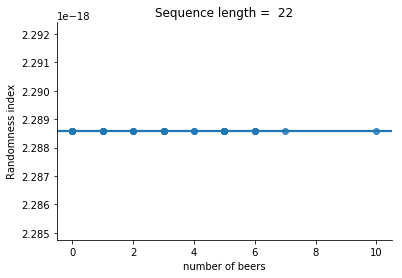

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     54.17
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           5.15e-08
Time:                        15:13:08   Log-Likelihood:                 2248.8
No. Observations:                  30   AIC:                            -4494.
Df Residuals:                      28   BIC:                            -4491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.289e-18   2.13e-34   1.08e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


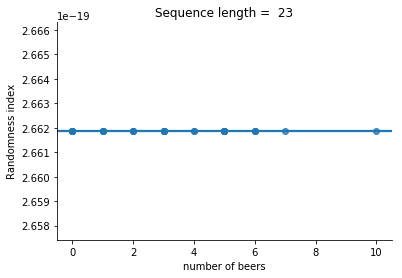

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -28.00
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:09   Log-Likelihood:                 2326.6
No. Observations:                  30   AIC:                            -4649.
Df Residuals:                      28   BIC:                            -4646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.662e-19   1.59e-35   1.67e+16      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


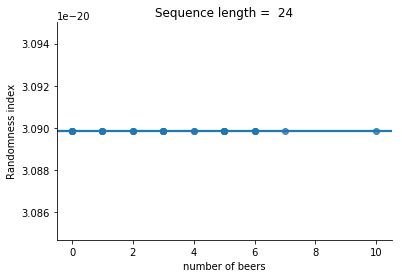

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                      -0.067
Model:                            OLS   Adj. R-squared:                 -0.105
Method:                 Least Squares   F-statistic:                    -1.750
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               1.00
Time:                        15:13:09   Log-Likelihood:                 2389.4
No. Observations:                  30   AIC:                            -4775.
Df Residuals:                      28   BIC:                            -4772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.09e-20   1.96e-36   1.58e+16      0.0

In [184]:
##

for probs in range(0, len(probs_1)):
    ##         
    beer_n = []
    r_value=[]
    winner=[]

    for r in df['rounds'].unique():
        r_value.append(df.loc[df['rounds']==r, probs_1[probs]].iloc[0])
        r_value.append(df.loc[df['rounds']==r, probs_2[probs]].iloc[0])
        beer_n.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
        beer_n.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  



    df_b_r_s = pd.DataFrame({'beer': beer_n, 'rand': r_value})
    df_b_r_s = remove_outlier_mult_columns( df_b_r_s, ['beer','rand'], plot=False)
    ####   
    sns.regplot(df_b_r_s['beer'], df_b_r_s['rand'], ci=68, fit_reg=True)
    plt.title('Sequence length =  ' + str(probs+1))
    plt.xlabel('number of beers')
    plt.ylabel('Randomness index')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()


    #ols
    mod = ols('rand ~ beer', data=df_b_r_s).fit()
    print(mod.summary())

## Is beeing random a good strategy to win?

In [185]:
v1 = df.loc[df['rounds']==r, 'randomness_p1'].iloc[0]
v2 = df.loc[df['rounds']==r, 'randomness_p2'].iloc[0]

np.mean([v1, v2])
#print(v1, v2)

31.5045

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


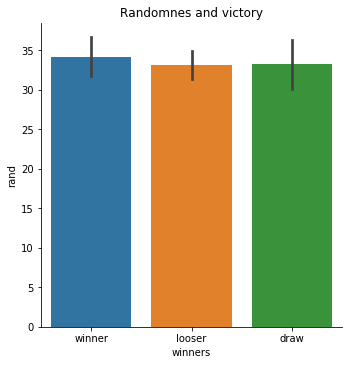

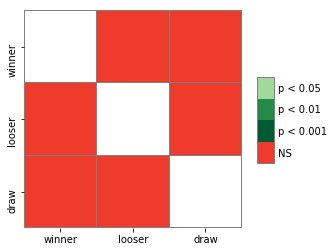

        winner  looser  draw
winner    -1.0     0.9   0.9
looser     0.9    -1.0   0.9
draw       0.9     0.9  -1.0


In [186]:
### I create a draw mean value by combing bothe the random value and beer consumption of the participants

w_r_value=[]
l_r_value=[]
d_r_value=[]

w_b=[]
l_b=[]
d_b=[]


for r in df['rounds'].unique():
    win = df.loc[df['rounds']==r, 'winner_round'].iloc[0]
    if win == df.loc[df['rounds']==r, 'player1'].iloc[0]:
        w_r_value.append(df.loc[df['rounds']==r, 'randomness_p1'].iloc[0])
        l_r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
        w_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
        l_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  
    elif win == df.loc[df['rounds']==r, 'player2'].iloc[0]:
        w_r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0])
        l_r_value.append(df.loc[df['rounds']==r, 'randomness_p1'].iloc[0])
        w_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])
        l_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
    else: ## draw
        d_r_value.append(df.loc[df['rounds']==r, 'randomness_p2'].iloc[0] ) 
        d_r_value.append( df.loc[df['rounds']==r, 'randomness_p1'].iloc[0] )
        d_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0] )
        d_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0] )

        

### Dataframe for each    
df_win = pd.DataFrame({'beer': w_b, 'rand': w_r_value})
df_win['winners'] = 'winner'
df_l = pd.DataFrame({'beer': l_b, 'rand': l_r_value})
df_l['winners'] = 'looser'
df_d = pd.DataFrame({'beer': d_b, 'rand': d_r_value})
df_d['winners'] = 'draw'
#concatenate them
df_w_l=pd.concat([df_win, df_l, df_d], ignore_index=True)

#Difference in mean randomness?
sns.factorplot(x='winners', y='rand', data=df_w_l, kind='bar', ci=68)
plt.title('Randomnes and victory')
plt.show()

#mod = ols('rand ~ winners', data=df_w_l).fit()
#print(mod.summary())

pc = sp.posthoc_tukey(df_w_l, val_col='rand', group_col='winners') 
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.show()
print(pc)


### Is drinking a goos strategy?

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


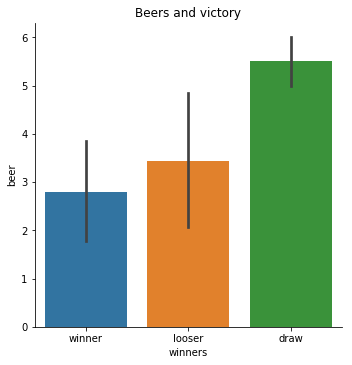

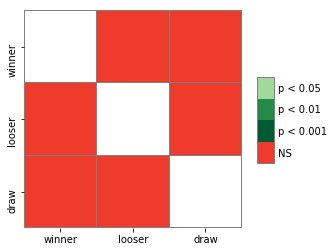

,winner,looser,draw
winner,-1.000000,0.759002,0.332333
looser,0.759002,-1.000000,0.519981
draw,0.332333,0.519981,-1.000000


In [187]:
#Difference in mean randomness?
sns.factorplot(x='winners', y='beer', data=df_w_l, kind='bar')
plt.title('Beers and victory')
plt.show()

pc = sp.posthoc_tukey(df_w_l, val_col='beer', group_col='winners') 
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.show()
pc

In [188]:

## Dimple regression model where we try to explain randomness as a function of beer consumption and as a winning strategy
mod = ols('rand ~ beer * C(winners)', data=df_w_l).fit()
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.9096
Date:                Mon, 18 Mar 2019   Prob (F-statistic):              0.491
Time:                        15:13:10   Log-Likelihood:                -101.23
No. Observations:                  30   AIC:                             214.5
Df Residuals:                      24   BIC:                             222.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [189]:
df_w_l['win']=(df_w_l['winners']=='winner')*1
mod = ols('win ~ beer', data=df_w_l).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    win   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9783
Date:                Mon, 18 Mar 2019   Prob (F-statistic):              0.331
Time:                        15:13:10   Log-Likelihood:                -21.192
No. Observations:                  30   AIC:                             46.38
Df Residuals:                      28   BIC:                             49.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5890      0.155      3.812      0.0